In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('/home/andrew/SpatialDS/new_colocation/colocation'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
import pandas as pd
import geopandas as gpd
import colocation
import utils

/home/andrew/anaconda3/envs/colocationv2/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [3]:
data = pd.read_csv('../../data/Minneapolis_toy_Input.csv')

In [4]:
data.head(5)

,safegraph_place_id,location_name,brands,top_category,sub_category,naics_code,latitude,longitude,city,region
0,sg:80ed5aeaee334840be638459707fbdc3,Walker Art Center,NaN,Other Miscellaneous Store Retailers,Art Dealers,453920,44.967992,-93.328,Minneapolis,MN
1,sg:d468aec1a90a437185360b5c1b1d00df,Bauhaus Brew Labs,NaN,Beverage Manufacturing,Breweries,312120,44.965000,-93.321,Minneapolis,MN
2,sg:4e218fe6f98147d0bdc8a5a29aeb2de3,Kaufman Container,NaN,Waste Treatment and Disposal,Hazardous Waste Treatment and Disposal,562211,44.972690,-93.325,Minneapolis,MN
3,sg:8e2618fb0f0a42a6994941c74b047cbe,The Malt Shop,NaN,Restaurants and Other Eating Places,Snack and Nonalcoholic Beverage Bars,722515,44.970000,-93.328,Minneapolis,MN
4,sg:6fa2311c1d284014a560ec1cfd026ac6,Arete Wealth Strategists,NaN,Other Financial Investment Activities,Investment Advice,523930,44.977794,-93.210,Minneapolis,MN


In [5]:
data['pos'] = gpd.points_from_xy(data.longitude, data.latitude)

|C1| = 9, |P1| = 9, |R1| = 0, Rows in T1 = 9, Elapsed Time: 0:00:00.008664
|C2| = 36, |P2| = 9, |R2| = 18, Rows in T2 = 9, Elapsed Time: 0:00:00.204044
|C3| = 5, |P3| = 5, |R3| = 15, Rows in T3 = 5, Elapsed Time: 0:00:00.371808


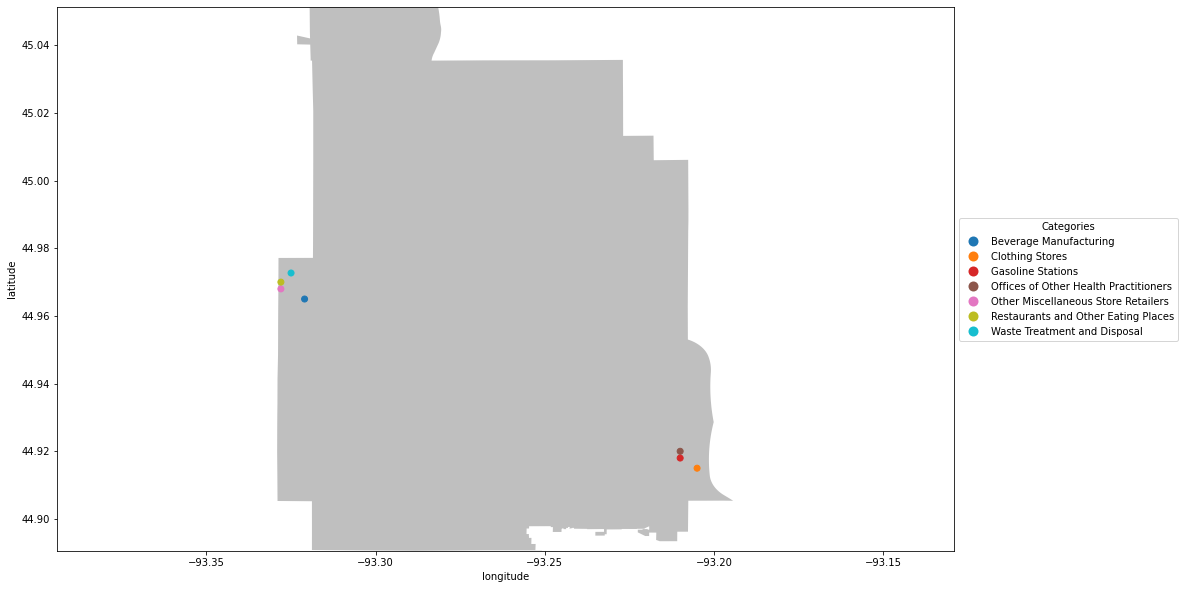

In [6]:
T,R = colocation.general(data, 'pos', 'top_category', 'safegraph_place_id', threshold=500, plot=True, out_plot='toy_out_plot', out_csv='toy_out_csv', shape_file='PolyMN/Polygon_MN.shp')

In [7]:
out = {}
for r in R:
    if len(r.items) == 3:
        out[r.antecedent] = r

for r in sorted(out.keys()):
    print(out[r])

{Beverage Manufacturing, Other Miscellaneous Store Retailers} => Restaurants and Other Eating Places (1.0, 1.0)
{Beverage Manufacturing, Restaurants and Other Eating Places} => Waste Treatment and Disposal (1.0, 1.0)
{Beverage Manufacturing, Waste Treatment and Disposal} => Restaurants and Other Eating Places (1.0, 1.0)
{Clothing Stores, Gasoline Stations} => Offices of Other Health Practitioners (1.0, 1.0)
{Clothing Stores, Offices of Other Health Practitioners} => Gasoline Stations (1.0, 1.0)
{Gasoline Stations, Offices of Other Health Practitioners} => Clothing Stores (1.0, 1.0)
{Other Miscellaneous Store Retailers, Restaurants and Other Eating Places} => Waste Treatment and Disposal (1.0, 1.0)
{Other Miscellaneous Store Retailers, Waste Treatment and Disposal} => Restaurants and Other Eating Places (1.0, 1.0)
{Restaurants and Other Eating Places, Waste Treatment and Disposal} => Other Miscellaneous Store Retailers (1.0, 1.0)


In [8]:
T[-1]

,cat1,id1,cat2,id2,cat3,id3,pos3
1,Beverage Manufacturing,sg:d468aec1a90a437185360b5c1b1d00df,Other Miscellaneous Store Retailers,sg:80ed5aeaee334840be638459707fbdc3,Restaurants and Other Eating Places,sg:8e2618fb0f0a42a6994941c74b047cbe,POINT (-93.328 44.970)
2,Beverage Manufacturing,sg:d468aec1a90a437185360b5c1b1d00df,Other Miscellaneous Store Retailers,sg:80ed5aeaee334840be638459707fbdc3,Waste Treatment and Disposal,sg:4e218fe6f98147d0bdc8a5a29aeb2de3,POINT (-93.325 44.973)
5,Beverage Manufacturing,sg:d468aec1a90a437185360b5c1b1d00df,Restaurants and Other Eating Places,sg:8e2618fb0f0a42a6994941c74b047cbe,Waste Treatment and Disposal,sg:4e218fe6f98147d0bdc8a5a29aeb2de3,POINT (-93.325 44.973)
10,Clothing Stores,sg:c15277b450de412fa40fedfc0e240732,Gasoline Stations,sg:deb9e9a6e10b48a1a7676ef8b5e98cf0,Offices of Other Health Practitioners,sg:555149b9b9ce4884a013083c10945892,POINT (-93.210 44.920)
15,Other Miscellaneous Store Retailers,sg:80ed5aeaee334840be638459707fbdc3,Restaurants and Other Eating Places,sg:8e2618fb0f0a42a6994941c74b047cbe,Waste Treatment and Disposal,sg:4e218fe6f98147d0bdc8a5a29aeb2de3,POINT (-93.325 44.973)
